# Variant check
N = ord("LLL") % 3 + 1

Where LLL – first big letter of your name (latin)


In [1]:
N = ord("M") % 3 + 1
print("Variant: " + str(N))

Variant: 3


## Варіант 3. Дослідження втрат бронетранспортерів (БТР).
1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.
2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).
3. Знайдіть добові втрати БТР.
4. Знайдіть 5 найбільших добових втрат БТР.
5. Визначте, скільки БТР було знищено влітку 2023 року.
6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

### Поради:
1. Використовуйте csv.reader() функцію для читання файлу csv.
2. Пропустіть перший рядок (із заголовками стовпців).
3. Не використовуйте цикли чи інші ітераційні конструкції для обробки масивів numpy. Використовуйте лише зрізи та/або універсальні (векторизовані) функції.
4. Створіть функції до завдань 3-7 кожного варіанта.

## 1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.

In [2]:
import csv
import numpy as np

def read_column_from_csv(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        np.set_printoptions(threshold=10000)
        
        reader = csv.reader(file)
        
        headers = next(reader) # reading headers (and skipping the first column)
        
        try:
            column_index = headers.index(column_name)
        except ValueError:
            raise ValueError(f"Column '{column_name}' has not found. Check parameters or file!")
        
        data = np.array(list(reader))  # convert to numpy arr
        
        column_data = data[:, column_index]
        return np.array(column_data, dtype=float)


### 2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).

In [10]:
filename = 'data/russia_losses_equipment.csv'
column_name = 'APC'

try:
    result = read_column_from_csv(filename, column_name)
    print(f"Column '{column_name}' value:\n", result)
except Exception as e:
    print("Error:", e)

Column 'APC' value:
 [19369. 19355. 19339. 19306. 19304. 19256. 19236. 19209. 19192. 19156.
 19143. 19119. 19092. 19059. 19021. 18994. 18968. 18947. 18896. 18847.
 18766. 18726. 18697. 18661. 18612. 18592. 18581. 18538. 18523. 18487.
 18470. 18450. 18433. 18404. 18395. 18355. 18332. 18287. 18254. 18229.
 18199. 18175. 18111. 18072. 18053. 18002. 17969. 17939. 17895. 17876.
 17827. 17800. 17765. 17751. 17740. 17710. 17679. 17658. 17627. 17596.
 17579. 17547. 17503. 17476. 17438. 17396. 17344. 17304. 17292. 17252.
 17222. 17170. 17132. 17093. 17080. 17077. 17071. 17063. 17043. 17003.
 16955. 16938. 16925. 16906. 16897. 16878. 16878. 16869. 16848. 16821.
 16786. 16760. 16736. 16722. 16699. 16681. 16667. 16648. 16631. 16620.
 16599. 16567. 16542. 16521. 16495. 16480. 16473. 16461. 16426. 16402.
 16385. 16368. 16363. 16350. 16341. 16332. 16323. 16294. 16286. 16255.
 16238. 16211. 16203. 16161. 16141. 16103. 16095. 16074. 16050. 16039.
 16013. 16000. 15980. 15963. 15917. 15902. 15883. 15871.

### 3. Знайдіть добові втрати БТР.

In [12]:
def daily_losses(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        np.set_printoptions(threshold=10000)

        reader = csv.reader(file)
        data = np.array(list(reader))
    
    headers = data[0]
    data = data[1:]

    try:
        column_index = list(headers).index(column_name)
    except ValueError:
        raise ValueError(f"Column '{column_name}' has not found. Check parameters or file!")
    
    column_data = data[:, column_index].astype(float)
    
    losses = np.abs(np.diff(column_data))
    return losses

filename = 'data/russia_losses_equipment.csv'
column_name = 'APC'

try:
    apc_losses = daily_losses(filename, column_name)
    print(f"Daily '{column_name}' losses array:\n", apc_losses)
except Exception as e:
    print("Error:", e)

Daily 'APC' losses array:
 [ 14.  16.  33.   2.  48.  20.  27.  17.  36.  13.  24.  27.  33.  38.
  27.  26.  21.  51.  49.  81.  40.  29.  36.  49.  20.  11.  43.  15.
  36.  17.  20.  17.  29.   9.  40.  23.  45.  33.  25.  30.  24.  64.
  39.  19.  51.  33.  30.  44.  19.  49.  27.  35.  14.  11.  30.  31.
  21.  31.  31.  17.  32.  44.  27.  38.  42.  52.  40.  12.  40.  30.
  52.  38.  39.  13.   3.   6.   8.  20.  40.  48.  17.  13.  19.   9.
  19.   0.   9.  21.  27.  35.  26.  24.  14.  23.  18.  14.  19.  17.
  11.  21.  32.  25.  21.  26.  15.   7.  12.  35.  24.  17.  17.   5.
  13.   9.   9.   9.  29.   8.  31.  17.  27.   8.  42.  20.  38.   8.
  21.  24.  11.  26.  13.  20.  17.  46.  15.  19.  12.   9.  36.  15.
  32.  24.  23.  17.  11.  19.  40.  16.  18.  11.  17.  17.  16.  26.
  19.  25.  21.   9.  19.  18.  15.  15.  11.  35.  18.  12.  20.  18.
   6.  29.  26.  21.  11.  32.  13.  26.   9.  20.  40.  16.  18.  22.
  33.  12.  22.  22.  33.  40.  15.  17.  11.  27.

### 4. Знайдіть 5 найбільших добових втрат БТР.

In [14]:
def top_5_daily_losses(filename, column_name):
    losses = daily_losses(filename, column_name) #result from task 3
    
    top_losses = np.sort(losses)[::-1][:5]
    return top_losses

filename = 'data/russia_losses_equipment.csv'
column_name = 'APC'

try:
    top_losses = top_5_daily_losses(filename, column_name)
    print(f"5 days with the biggest APC daily losses:\n", top_losses)
except Exception as e:
    print("Error:", e)

5 days with the biggest APC daily losses:
 [190. 120. 110.  96.  91.]


### 5. Визначте, скільки БТР було знищено влітку 2023 року.

In [19]:
import csv
import numpy as np
from datetime import datetime

def destroyed_apc_summer_2023(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        np.set_printoptions(threshold=10000)

        reader = csv.reader(file)
        data = np.array(list(reader))
    
    headers = data[0]
    data = data[1:]
    
    try:
        column_index = list(headers).index(column_name)
    except ValueError:
        raise ValueError(f"Column '{column_name}' has not found. Check parameters or file!")
    

    date_column = data[:, 0] 
    apc_column = data[:, column_index].astype(float)
    
    # convert data from file to datetime
    dates = np.array([datetime.strptime(date, "%Y-%m-%d") for date in date_column])
    
    # count the losses
    daily_apc_losses = np.abs(np.diff(apc_column))
    
    # Filter for summer 2023
    summer_2023_mask = (dates[1:] >= datetime(2023, 6, 1)) & (dates[1:] <= datetime(2023, 8, 31))
    
    # Sum
    summer_2023_apc_losses = daily_apc_losses[summer_2023_mask]
    total_destroyed_apc = np.sum(summer_2023_apc_losses)
    
    return total_destroyed_apc

filename = 'data/russia_losses_equipment.csv'
column_name = 'APC'

try:
    total_destroyed_apc = destroyed_apc_summer_2023(filename, column_name)
    print(f"Amount of destroyed APC in summer 2023: {total_destroyed_apc}")
except Exception as e:
    print("Error:", e)


Amount of destroyed APC in summer 2023: 1135.0


### 6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.

In [27]:
import csv
import numpy as np
from datetime import datetime

def destroyed_apc_average_100_500_days(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        np.set_printoptions(threshold=10000)

        reader = csv.reader(file)
        data = np.array(list(reader))
    
    headers = data[0]
    data = data[1:]
    
    try:
        column_index = list(headers).index(column_name)
    except ValueError:
        raise ValueError(f"Column '{column_name}' has not found. Check parameters or file!")
    
    apc_column = data[:, column_index].astype(float)
    
    # flipping array (now first day will be at the beginning of array)
    apc_column_reversed = np.flip(apc_column)
    
    daily_apc_losses = np.diff(apc_column_reversed)
    
    # searching from 100 to 500 day
    selected_apc_losses = daily_apc_losses[99:500]
    
    # average
    average_apc_losses = np.mean(selected_apc_losses)
    
    return average_apc_losses

filename = 'data/russia_losses_equipment.csv'
column_name = 'APC'

try:
    average_apc_losses = destroyed_apc_average_100_500_days(filename, column_name)
    print(f"Average APC losses from 100th to 500th day: {average_apc_losses}")
except Exception as e:
    print("Error:", e)


Average APC losses from 100th to 500th day: 11.438902743142144


### 7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

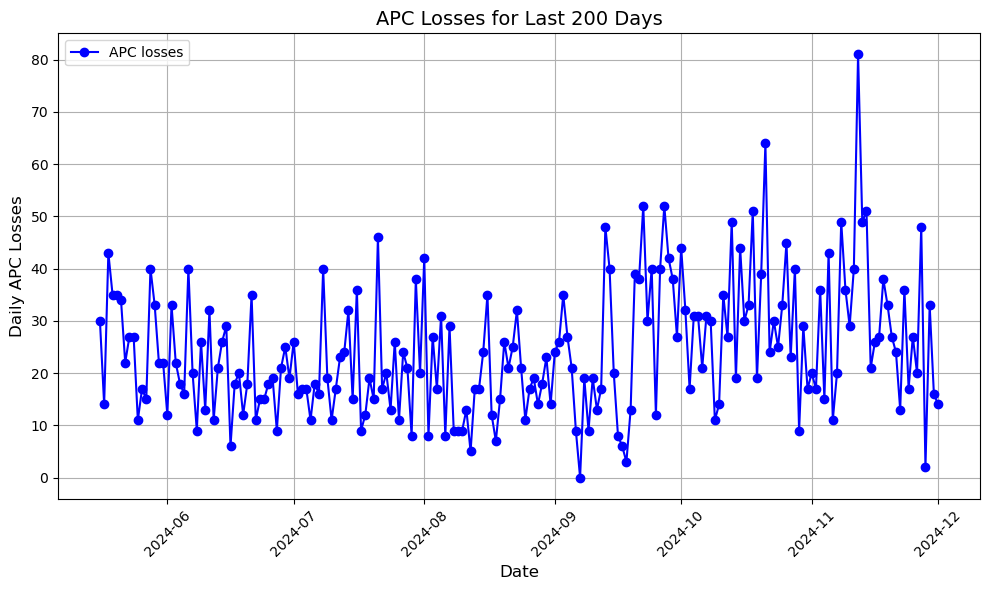

In [48]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def plot_apc_losses_last_200_days(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        np.set_printoptions(threshold=10000)

        reader = csv.reader(file)
        data = np.array(list(reader))
    
    headers = data[0]
    data = data[1:]
    
    try:
        column_index = list(headers).index(column_name)
    except ValueError:
        raise ValueError(f"Column '{column_name}' has not found. Check parameters or file!")

    apc_column = data[:, column_index].astype(float)
    
    # flipping array
    apc_column_reversed = np.flip(apc_column)
    
    daily_apc_losses = np.diff(apc_column_reversed)
    
    # taking last 200 dats
    last_200_days_losses = daily_apc_losses[-200:]
    
    # converting losses from negative to positive
    last_200_days_losses = np.abs(last_200_days_losses)
    
    date_column = data[:, 0]
    dates = np.array([datetime.strptime(date, "%Y-%m-%d") for date in date_column])
    
    dates_reversed = np.flip(dates)
    
    last_200_dates = dates_reversed[-200:]
    
    # GRAPHIC CONFIGURATION
    plt.figure(figsize=(10, 6))
    plt.plot(last_200_dates, last_200_days_losses, marker='o', color='b', label='APC losses')
    plt.title('APC Losses for Last 200 Days', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Daily APC Losses', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

filename = 'data/russia_losses_equipment.csv'
column_name = 'APC'

try:
    plot_apc_losses_last_200_days(filename, column_name)
except Exception as e:
    print("Error:", e)
